In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
## Create data for the bar plot

# data sizes
m = 30
n = 6

data = np.zeros((m,n))
for i in range(n):
    data[:,i] = 30*np.random.randn(m) * (2*i/(n-1)-1)**2 + (i+1)**2

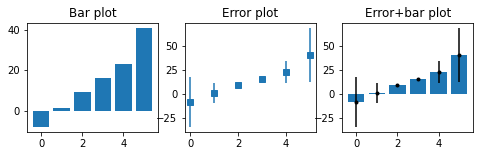

In [8]:
fig, ax = plt.subplots(1,3,figsize=(8,2))

# "naked" bars
ax[0].bar(range(n), np.mean(data, axis=0))
ax[0].set_title("Bar plot")

# just the error bars
ax[1].errorbar(range(n), np.mean(data, axis=0), np.std(data,axis=0,ddof=1), marker="s", linestyle="")
ax[1].set_title("Error plot")

# both
ax[2].bar(range(n), np.mean(data,axis=0))
ax[2].errorbar(range(n), np.mean(data, axis=0), np.std(data, axis=0, ddof=1), marker=".", linestyle="", color="k")
ax[2].set_title("Error+bar plot")

plt.show()

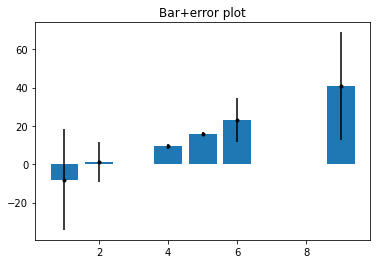

In [9]:
## manually specify x-axis coordinates
xcrossings = [1, 2, 4, 5, 6, 9]
plt.bar(xcrossings, np.mean(data, axis=0))
plt.errorbar(xcrossings, np.mean(data,axis=0), np.std(data,axis=0,ddof=1), marker=".",linestyle="",color="k")
plt.title("Bar+error plot")

plt.show()

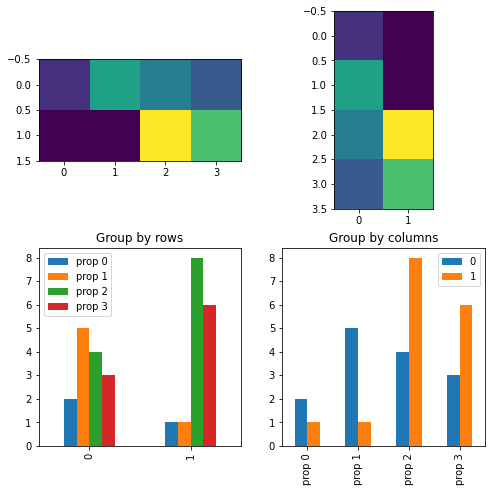

In [10]:
m = [[2,5,4,3], [1,1,8,6]]

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(8,8))
ax[0,0].imshow(m)

df = pd.DataFrame(m, columns=["prop 0", "prop 1", 'prop 2', 'prop 3'])
df.plot(ax=ax[1,0], kind='bar')
ax[1,0].set_title('Group by rows')

ax[0,1].imshow(np.array(m).T)
df.T.plot(ax=ax[1,1], kind='bar')
ax[1,1].set_title('Group by columns')

plt.show()

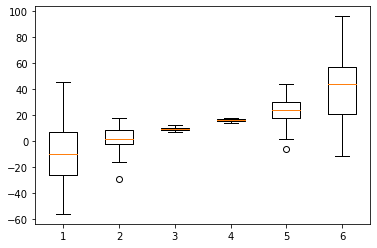

In [11]:
plt.boxplot(data)
plt.show()

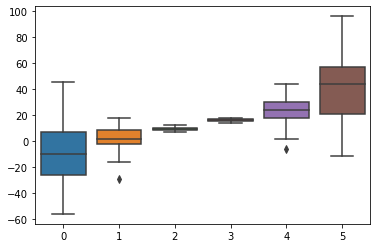

In [14]:
sns.boxplot(data=data, orient='v')
plt.show()

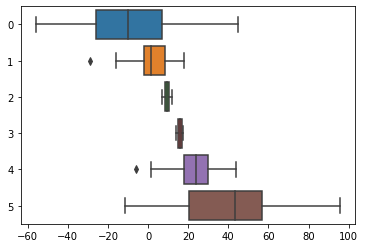

In [15]:
df = pd.DataFrame(data, columns=['zero', 'one', 'two', 'three','four','five'])
sns.boxplot(data=data,orient='h')
plt.show()

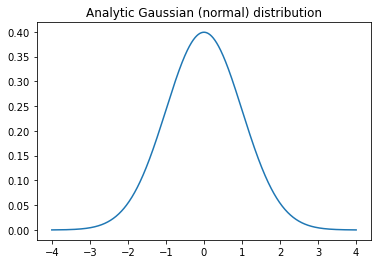

124.99221530601626


In [5]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

N = 1001 # 
X = np.linspace(-4, 4, N)
gausdist = stats.norm.pdf(X)

plt.plot(X, gausdist)
plt.title('Analytic Gaussian (normal) distribution')
plt.show()

print(sum(gausdist))

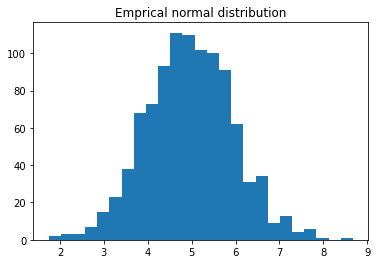

In [6]:
# Normally-distributed random numbers

# parameters
stretch = 1 #variance(square of standard deviation)
shift = 5 # mean
n = 1000

# create data
data = stretch*np.random.randn(n) + shift

# plot data
plt.hist(data, 25)
plt.title('Emprical normal distribution')
plt.show()

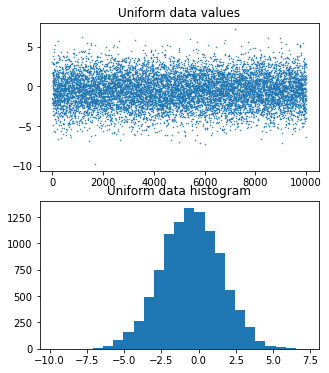

In [7]:
# Uniformly-distributed numbers

# parameters
stretch = 2
shift = .5
n = 10000


# create data
data = stretch*np.random.randn(n) + shift-stretch/2

# plot data
fig,ax = plt.subplots(2,1, figsize=(5,6))

ax[0].plot(data, '.', markersize=1)
ax[0].set_title('Uniform data values')

ax[1].hist(data, 25)
ax[1].set_title('Uniform data histogram')

plt.show()

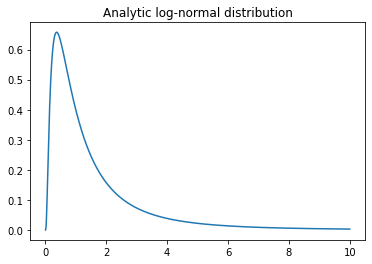

In [8]:
# log-normal distribution

N = 1001
x = np.linspace(0, 10, N)
lognormdist = stats.lognorm.pdf(x,1)

plt.plot(x, lognormdist)
plt.title('Analytic log-normal distribution')
plt.show()

[180.99155789 216.5572356  219.19921446 ... 165.00805047 173.55030621
 177.70939942]


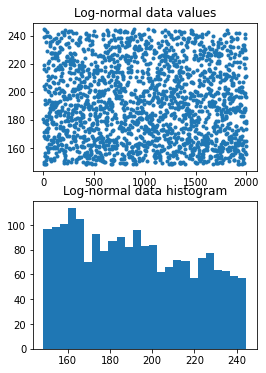

In [13]:
shift = 5
stretch = .5
n = 2000

data = stretch*np.random.rand(n) + shift
data = np.exp(data)

print(data)

fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(data, '.')
ax[0].set_title('Log-normal data values')

ax[1].hist(data, 25)
ax[1].set_title('Log-normal data histogram')
plt.show()

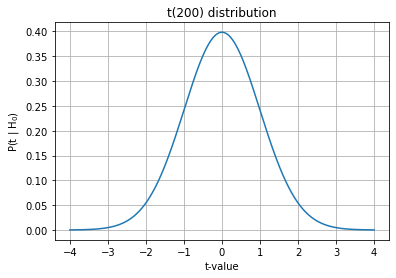

In [17]:
x = np.linspace(-4, 4, 1001)
df = 200
t = stats.t.pdf(x, df)

plt.plot(x, t)
plt.xlabel('t-value')
plt.ylabel('P(t | H$_0$)')
plt.title('t(%g) distribution'%df)
plt.grid(True)
plt.show()


### Shannon Entropy
Entropy in informatoin theory:
Suprising things convey more information

$$
H = -\sum^n_{i=1}p(x_i)log_2(p(x_i))
$$

where $x$ is data values, and $p$ represents probability.

- High entropy means that the dataset has a lot of cariability,
- Low entropy means that most of the values of the dataset repeat (and therefore are redundant).

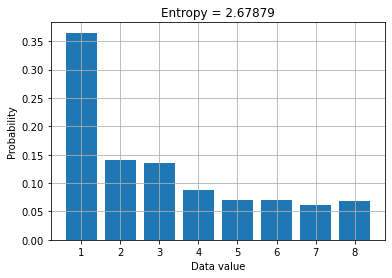

In [21]:
## discrete entropy
import numpy as np

# generate data
N = 1000
numbers = np.ceil(8*np.random.rand(N)**2)

# get counts and probabilities
u = np.unique(numbers)
probs = np.zeros(len(u))

for ui in range(len(u)):
    probs[ui] = sum(numbers==u[ui])/N
    
# compute entropy
entropee = -sum(probs*np.log2(probs+np.finfo(float).eps))

# plot
plt.bar(u, probs)
plt.title('Entropy = %g'%entropee)
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA

In [10]:
marriage_csv = 'state-marriage-rates-90-95-99-19.xlsx'
divorce_csv = 'state-divorce-rates-90-95-99-19.xlsx'


In [11]:
data = pd.read_excel(marriage_csv, header=5)
data


,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8.0,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6.0,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4.0,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2


In [12]:
data.drop([0,52,53,54,55,56,57], axis=0, inplace=True)
data = data.iloc[:,:24]
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8.0,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6.0,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4.0,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9.0,9.4,9.3,8.9,8.7,9.9,10.9


In [13]:
data.fillna(data.median(), inplace=True)
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8.0,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6.0,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4.0,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9.0,9.4,9.3,8.9,8.7,9.9,10.9


In [15]:
yearM = data.columns[1:24].to_numpy().astype(float)

statesM = data.iloc[:,0]

M = data.iloc[:,1:24].to_numpy().astype(float)
M
np.round(M,2)

array([[ 6.7 ,  6.76,  7.05, ..., 10.8 ,  9.8 , 10.6 ],
       [ 6.51,  6.68,  6.91, ...,  8.6 ,  9.  , 10.2 ],
       [ 5.3 ,  5.53,  5.83, ...,  8.2 ,  8.8 , 10.  ],
       ...,
       [ 5.98,  6.07,  6.31, ...,  7.5 ,  6.1 ,  7.2 ],
       [ 5.04,  5.43,  5.63, ...,  6.7 ,  7.  ,  7.9 ],
       [ 7.01,  7.05,  7.13, ...,  9.9 , 10.6 , 10.7 ]])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


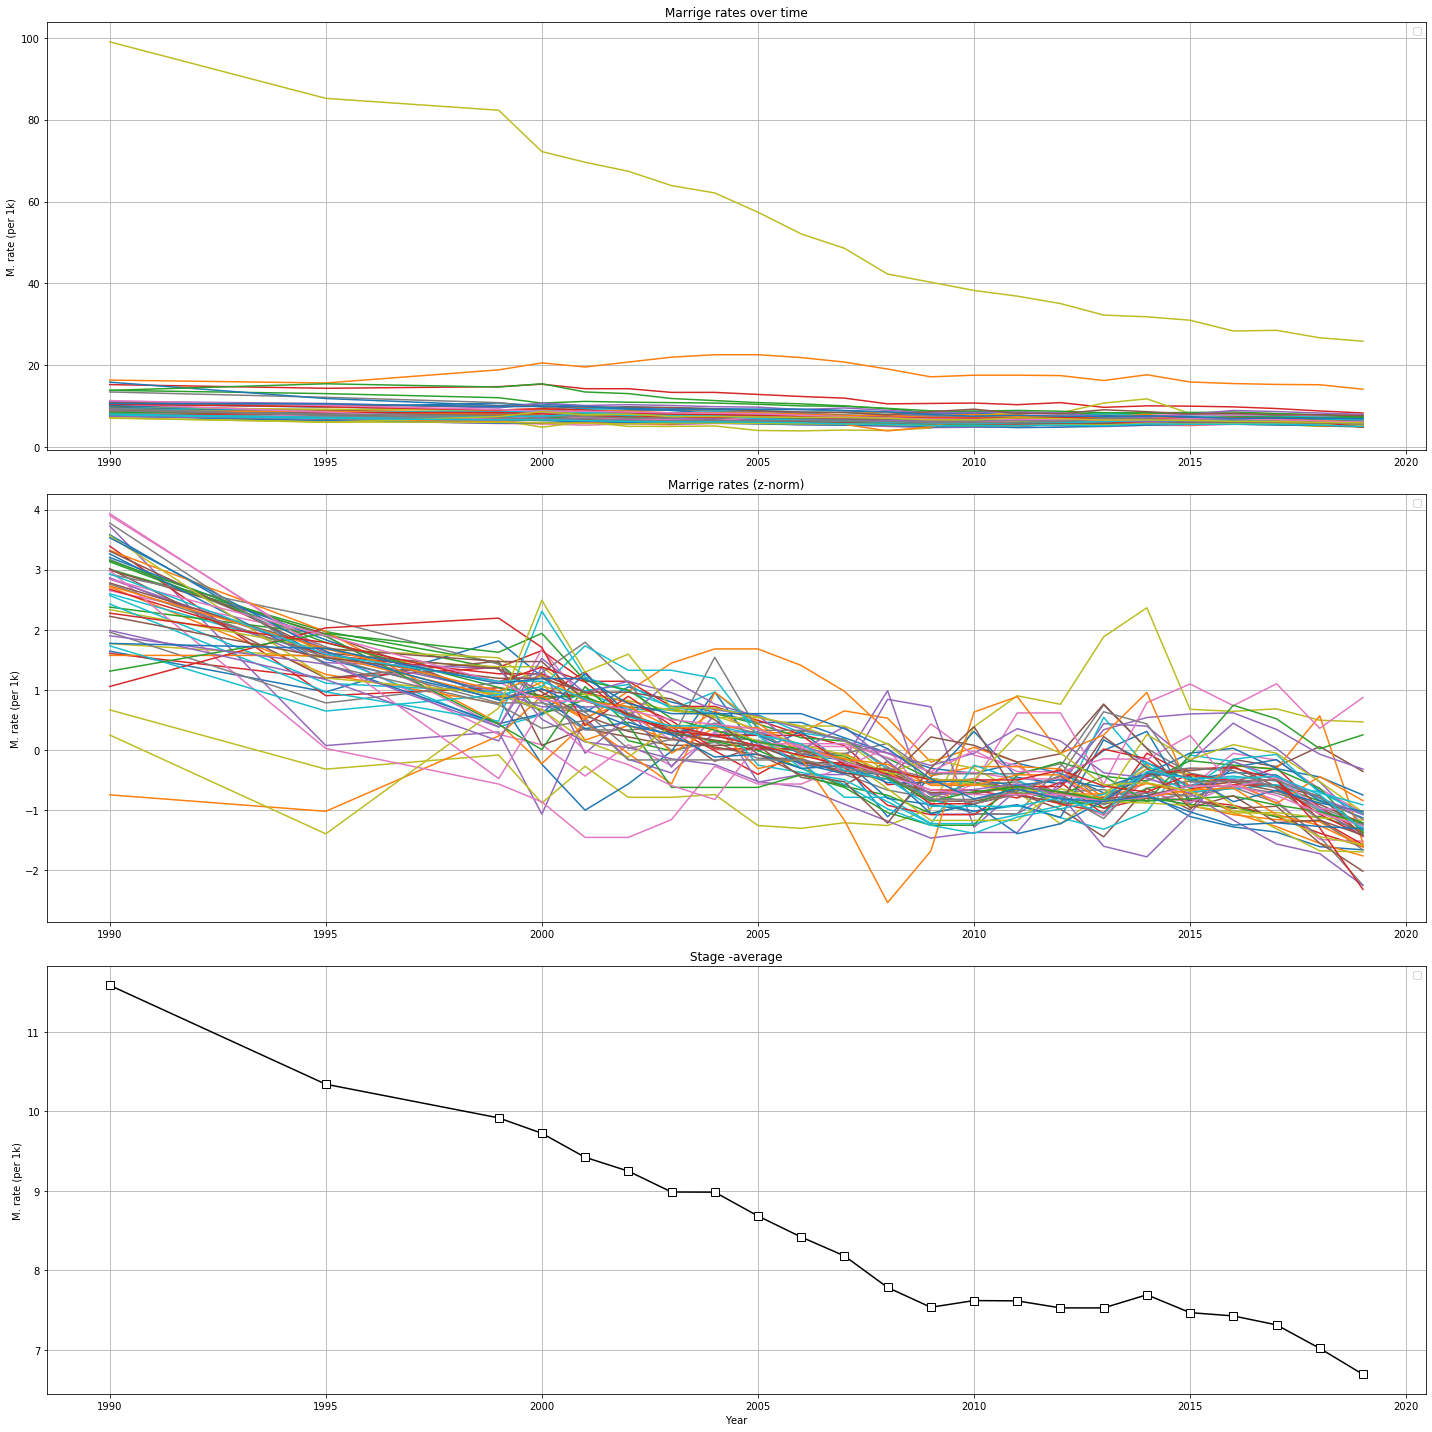

In [16]:
fig, ax = plt.subplots(3,1,figsize=(20,20))

#print(M.T)
ax[0].plot(yearM, M.T)
ax[0].grid(True)
ax[0].legend()
ax[0].set_ylabel('M. rate (per 1k)')
ax[0].set_title('Marrige rates over time')

ax[1].plot(yearM, stats.zscore(M.T))
ax[1].grid(True)
ax[1].legend()
ax[1].set_ylabel('M. rate (per 1k)')
ax[1].set_title('Marrige rates (z-norm)')

ax[2].plot(yearM, np.mean(M,axis=0), 'ks-',markerfacecolor='w', markersize=8)
ax[2].grid(True)
ax[2].legend()
ax[2].set_ylabel('M. rate (per 1k)')
ax[2].set_xlabel('Year')
ax[2].set_title('Stage -average')

plt.tight_layout()
plt.savefig('marriage.png')
plt.show()


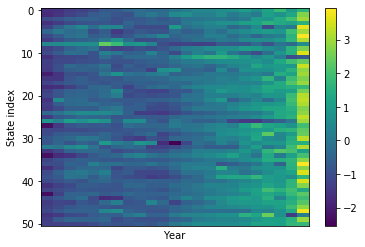

In [17]:
plt.imshow(stats.zscore(M, axis=1), aspect='auto')
plt.xticks([])
plt.xlabel('Year')
plt.ylabel('State index')
plt.colorbar()
plt.show()

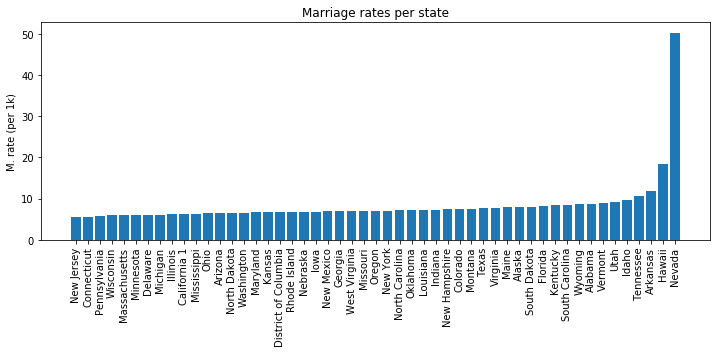

In [18]:
meanMarriageRate = np.mean(M, axis=1)

side_M = np.argsort(meanMarriageRate)

fig = plt.figure(figsize=(12,4))
plt.bar(statesM.iloc[side_M], meanMarriageRate[side_M])
plt.xticks(rotation=90)
plt.ylabel('M. rate (per 1k)')
plt.title('Marriage rates per state')
plt.show()

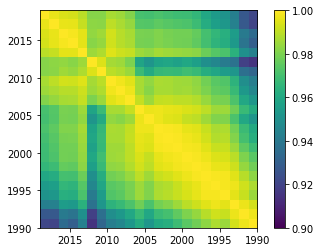

In [22]:
plt.imshow(np.corrcoef(M.T), vmin=.9, vmax=1,
          extent=[yearM[0], yearM[-1], yearM[-1], yearM[0]])
plt.colorbar()
plt.show()

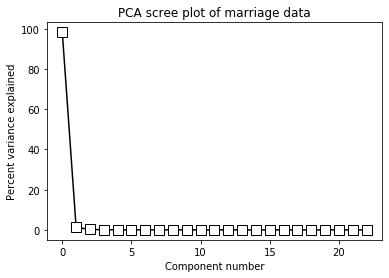

In [25]:
pca  = PCA().fit(M)

# scree plot
plt.plot(100*pca.explained_variance_ratio_, 'ks-', markerfacecolor='w', markersize=10)
plt.ylabel('Percent variance explained')
plt.xlabel('Component number')
plt.title('PCA scree plot of marriage data')
plt.show()

### Repeat for divorce data

In [27]:
# import the data
data = pd.read_excel(divorce_csv, header=5)
data.drop([0,52,53,54,55,56,57], axis=0, inplace=True)
data = data.iloc[:,:24]
data.fillna(data.median(), inplace=True)
yearD = data.columns[1:24].to_numpy().astype(float)
statesD = data.iloc[:,0]
D= data.iloc[:,1:24].to_numpy().astype(float)
np.round(D,2)

array([[3.57, 3.71, 3.66, ..., 5.7 , 6.  , 6.1 ],
       [3.64, 3.73, 3.58, ..., 5.  , 5.  , 5.5 ],
       [2.92, 2.95, 3.48, ..., 4.6 , 6.2 , 6.9 ],
       ...,
       [3.58, 3.25, 3.48, ..., 4.9 , 5.2 , 5.3 ],
       [2.33, 2.46, 2.43, ..., 3.2 , 3.4 , 3.6 ],
       [3.8 , 3.75, 3.96, ..., 5.7 , 6.6 , 6.6 ]])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


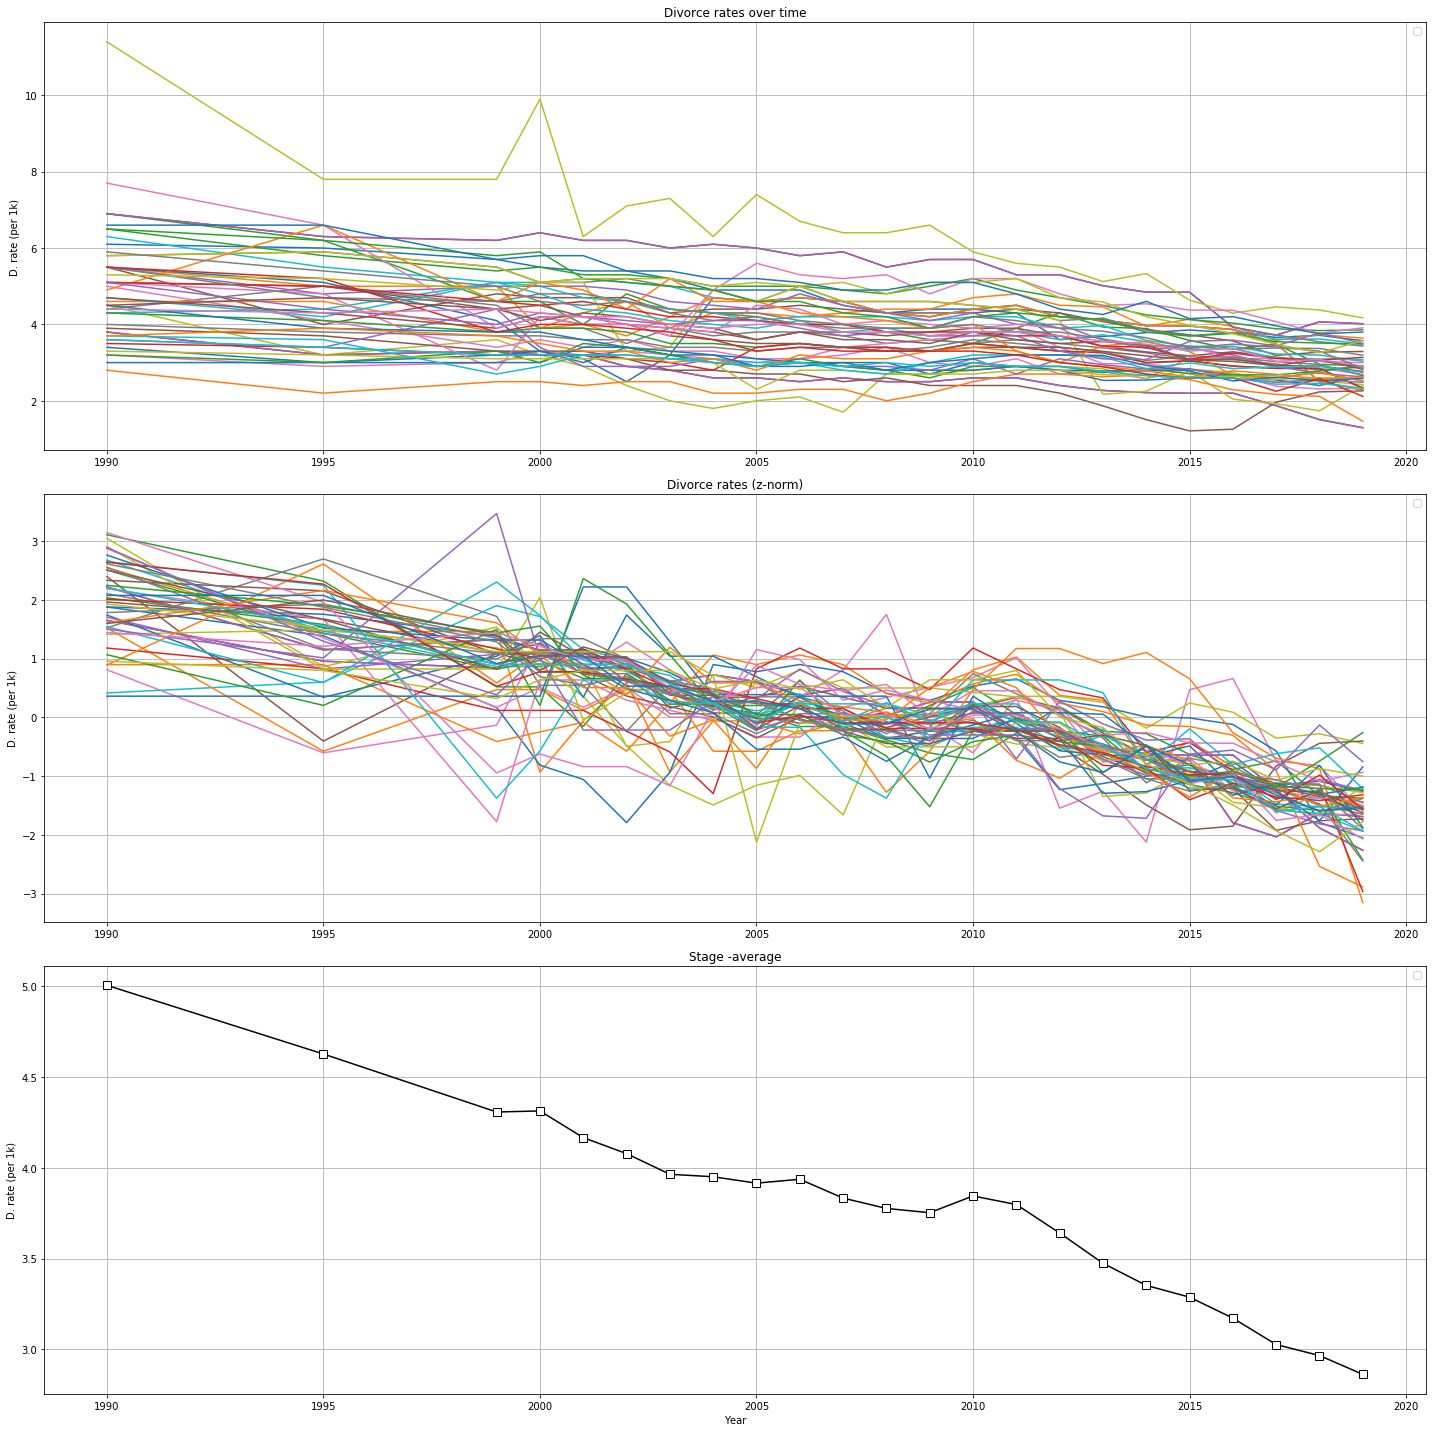

In [29]:
fig, ax = plt.subplots(3,1,figsize=(20,20))

#print(M.T)
ax[0].plot(yearD, D.T)
ax[0].grid(True)
ax[0].legend()
ax[0].set_ylabel('D. rate (per 1k)')
ax[0].set_title('Divorce rates over time')

ax[1].plot(yearD, stats.zscore(D.T))
ax[1].grid(True)
ax[1].legend()
ax[1].set_ylabel('D. rate (per 1k)')
ax[1].set_title('Divorce rates (z-norm)')

ax[2].plot(yearM, np.mean(D,axis=0), 'ks-',markerfacecolor='w', markersize=8)
ax[2].grid(True)
ax[2].legend()
ax[2].set_ylabel('D. rate (per 1k)')
ax[2].set_xlabel('Year')
ax[2].set_title('Stage -average')

plt.tight_layout()
plt.show()

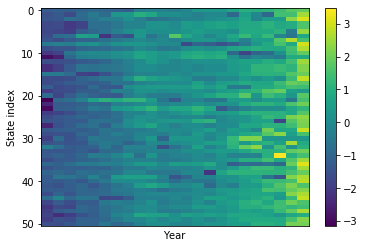

In [31]:
plt.imshow(stats.zscore(D, axis=1), aspect='auto')
plt.xticks([])
plt.xlabel('Year')
plt.ylabel('State index')
plt.colorbar()
plt.show()

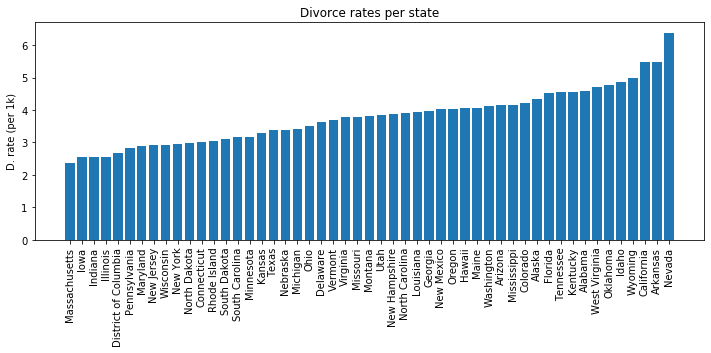

In [33]:
meanDivorceRate = np.mean(D, axis=1)

side_D = np.argsort(meanDivorceRate)

fig = plt.figure(figsize=(12,4))
plt.bar(statesD.iloc[side_D], meanDivorceRate[side_D])
plt.xticks(rotation=90)
plt.ylabel('D. rate (per 1k)')
plt.title('Divorce rates per state')
plt.show()

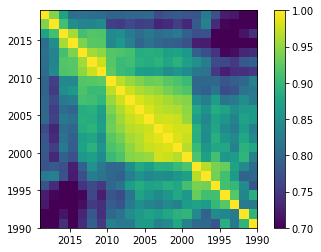

In [38]:
plt.imshow(np.corrcoef(D.T), vmin=.7, vmax=1,
          extent=[yearD[0], yearM[-1], yearD[-1], yearD[0]])
plt.colorbar()
plt.show()

### pca  = PCA().fit(D)

# scree plot
plt.plot(100*pca.explained_variance_ratio_, 'ks-', markerfacecolor='w', markersize=10)
plt.ylabel('Percent variance explained')
plt.xlabel('Component number')
plt.title('PCA scree plot of divorce data')
plt.grid(True)
plt.show()

In [42]:
# check if marriage and divorce datasets have the same year/state 
#compare the length
print('Comparison of year vectors: ')
print(np.sum(yearD-yearM))

#compare if they are identical
print(' ')
print('Comparison of states vectors: ')
print(statesM.equals(statesD))

#concanate all
tmpStateNames = pd.concat([statesM, statesD], axis=1)
print(tmpStateNames)

#compare
np.where(tmpStateNames.iloc[:,0] != tmpStateNames.iloc[:,1])

Comparison of year vectors: 
0.0
 
Comparison of states vectors: 
False
              Unnamed: 0            Unnamed: 0
1                Alabama               Alabama
2                 Alaska                Alaska
3                Arizona               Arizona
4               Arkansas              Arkansas
5           California 1            California
6               Colorado              Colorado
7            Connecticut           Connecticut
8               Delaware              Delaware
9   District of Columbia  District of Columbia
10               Florida               Florida
11               Georgia               Georgia
12                Hawaii                Hawaii
13                 Idaho                 Idaho
14              Illinois              Illinois
15               Indiana               Indiana
16                  Iowa                  Iowa
17                Kansas                Kansas
18              Kentucky              Kentucky
19             Louisiana           

(array([4]),)

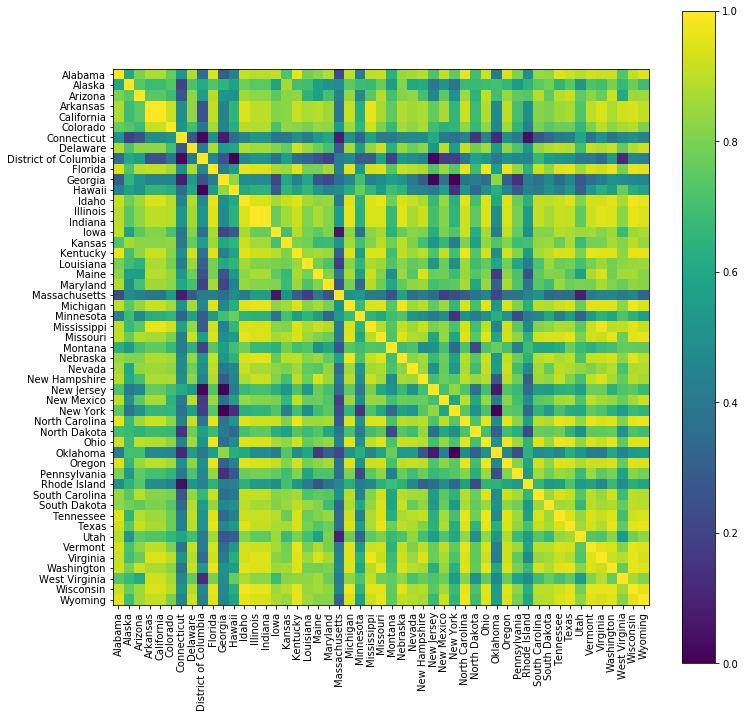

In [44]:
fig = plt.figure(figsize=(12,12))
plt.imshow(np.corrcoef(D), vmin=0, vmax=1)
plt.xticks(ticks=range(len(statesD)), labels=statesD, rotation=90)
plt.yticks(ticks=range(len(statesD)), labels=statesD)
plt.colorbar()
plt.show()

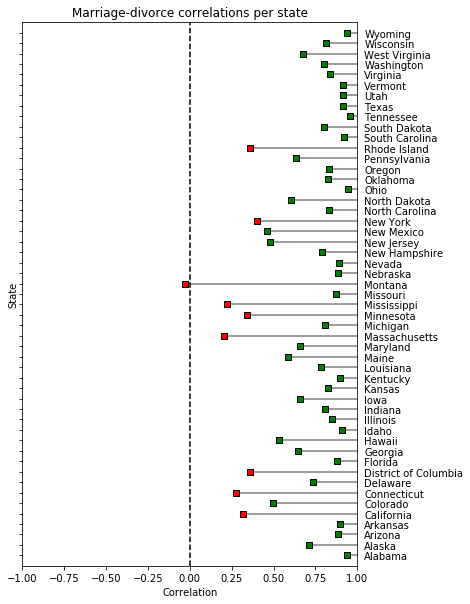

In [47]:
# Correlate M and  over time per state

#Bonferroni corrected threshold
pvalThresh = .05#/51

fig = plt.figure(figsize=(6,10))

color = 'rg'
for si in range(len(statesM)):
    #compute correlation
    r, p = stats.pearsonr(M[si,:], D[si,:])
    
    #plot the data point
    plt.plot([r,1], [si,si], '-',color=[.5,.5,.5])
    plt.plot(r,si,'ks', markerfacecolor=color[bool(p<pvalThresh)])

plt.ylabel('State')
plt.xlabel('Correlation')
plt.title('Marriage-divorce correlations per state')
plt.yticks(range(len(statesM)), labels=statesD)
plt.tick_params(axis='y', which="both", labelleft=False, labelright=True)
plt.xlim([-1,1])
plt.ylim([-1,51])
plt.plot([0,0], [-1,51], 'k--')
plt.show()

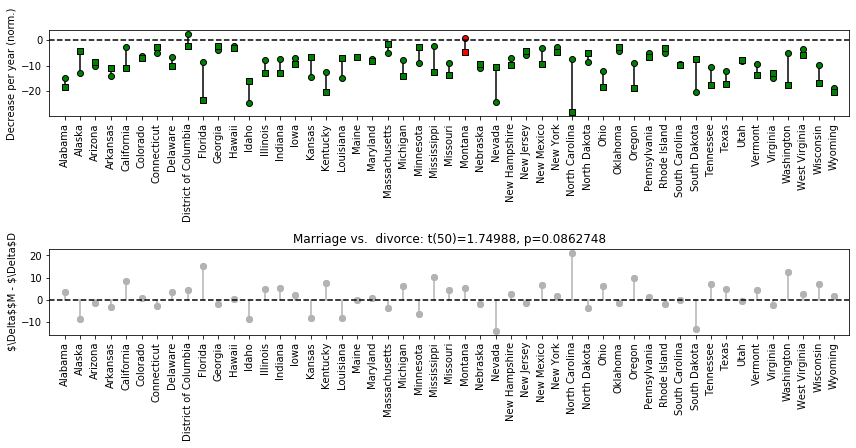

In [49]:
# have marriage/divorce rates really declined over time?
fig, ax = plt.subplots(2,1, figsize=(12,6))

# initialize slope differences vector
MvsD = np.zeros(len(statesM))

for rowi in range(len(statesM)):
    # run regression (includes the intercept)
    bM, intercept, r, pM, seM = stats.linregress(yearM, M[rowi, :])
    bD, intercept, r, pD, seD = stats.linregress(yearD, D[rowi, :])
    
    # normalize beta coefficients
    bM = bM / seM
    bD = bD / seD
    
    #plot the slove values
    ax[0].plot([rowi,rowi], [bM, bD], 'k')
    ax[0].plot(rowi, bM, 'ko', markerfacecolor=color[bool(pM<pvalThresh)])
    ax[0].plot(rowi, bD, 'ks', markerfacecolor=color[bool(pM<pvalThresh)])
    
    #plot the slop difference
    ax[1].plot([rowi, rowi], [bM-bD, 0], 'k-', color=[.7, .7, .7])
    ax[1].plot([rowi, rowi], [bM-bD, bM-bD], 'ko', color=[.7, .7, .7])
    
    
    #store the slope difference for subsequent t-test
    MvsD[rowi] = bM-bD
    
for i in range(2):
    ax[i].set_xticks(range(51))
    ax[i].set_xticklabels(statesD, rotation=90)
    ax[i].set_xlim([-1,51])
    ax[i].plot([-1,52], [0,0], 'k--')
    
ax[0].set_ylabel('Decrease per year (norm.)')
ax[1].set_ylabel('$\Delta$$M - $\Delta$D')

t, p = stats.ttest_1samp(MvsD, 0)
df = len(MvsD) - 1

ax[1].set_title('Marriage vs.  divorce: t(%g)=%g, p=%g'%(df, t, p))

plt.tight_layout()
plt.show()